# Clear Lake Reservoir LST Temperature Analysis

This notebook borrows heavily from Steven Pestana's 'hypothesis testing' notebook presented at WHW 2020.

In [1]:
import numpy as np
import pandas as pd

# scipy statistics package
import scipy.stats as st

# for plotting
import matplotlib.pyplot as plt
# tell jupyter to show our plots in the notebook here
%matplotlib inline

In [2]:
# Filepath to our excel file.
clear_LST_day_fp = 'GEEcode/GEEout/temp_stats_dayLST_clear_v2.csv'

# Use pandas.read_excel() function to open this file.
clear_LST_day = pd.read_csv(clear_LST_day_fp)

# Now we can see the dataset we loaded:
clear_LST_day.head(3)

,system:index,LST_Day_1km_max,LST_Day_1km_median,LST_Day_1km_min,LST_Day_1km_stdDev,modis_time,pixel_count,.geo
0,2010_01_01,1.17,-0.75,-2.85,0.915396,1262304000000,29,NaN
1,2010_01_02,NaN,NaN,NaN,NaN,1262390400000,0,NaN
2,2010_01_03,0.69,-0.19,-0.85,0.539828,1262476800000,21,NaN


/opt/conda/envs/whw/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


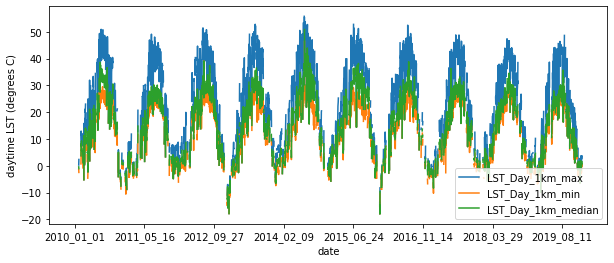

In [3]:
# Plot temperature over system:index
fig, ax = plt.subplots(figsize=(10,4))

clear_LST_day.plot(x='system:index', y='LST_Day_1km_max', ax=ax)
clear_LST_day.plot(x='system:index', y='LST_Day_1km_min', ax=ax)
clear_LST_day.plot(x='system:index', y='LST_Day_1km_median', ax=ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

In [4]:
#filter out days with less tan 75% observations
obs_cutoff = max(clear_LST_day['pixel_count'])*0.75

clear_LST_day_filt = clear_LST_day[ clear_LST_day['pixel_count'] >= obs_cutoff ]

clear_LST_day_filt.head(5)

,system:index,LST_Day_1km_max,LST_Day_1km_median,LST_Day_1km_min,LST_Day_1km_stdDev,modis_time,pixel_count,.geo
13,2010_01_14,3.59,2.12,0.97,0.623873,1263427200000,40,NaN
33,2010_02_03,4.75,2.13,0.83,1.188120,1265155200000,30,NaN
39,2010_02_09,9.07,3.65,2.13,1.975312,1265673600000,32,NaN
45,2010_02_15,7.21,3.73,0.73,1.670218,1266192000000,39,NaN
46,2010_02_16,12.99,7.31,4.49,2.293101,1266278400000,40,NaN


/opt/conda/envs/whw/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


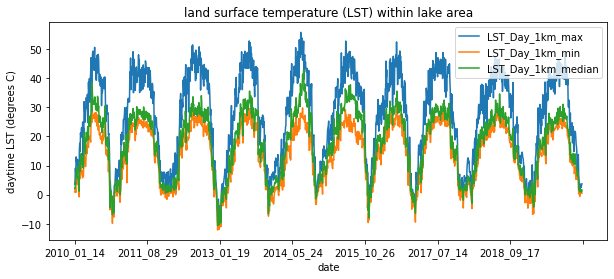

In [5]:
# Plot temperature over system:index
fig, ax = plt.subplots(figsize=(10,4))

clear_LST_day_filt.plot(x='system:index', y='LST_Day_1km_max', ax=ax)
clear_LST_day_filt.plot(x='system:index', y='LST_Day_1km_min', ax=ax)
clear_LST_day_filt.plot(x='system:index', y='LST_Day_1km_median', ax=ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('land surface temperature (LST) within lake area');

plt.savefig('GEEcode/GEEout/LST_temp_bgs.png')


/opt/conda/envs/whw/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


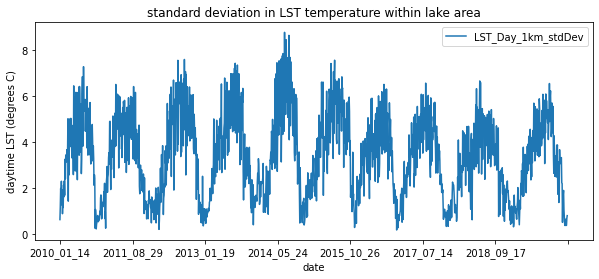

In [6]:

fig, ax=plt.subplots(figsize=(10,4))

clear_LST_day_filt.plot(x='system:index', y='LST_Day_1km_stdDev', ax = ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('standard deviation in LST temperature within lake area');

plt.savefig('GEEcode/GEEout/LST_stdev_bgs.png')